## Breast Cancer Prediction

Breast Cancer Prediction ha come obiettivo quello di creare un classificatore che può aiutare a diagnosticare i pazienti e prevedere la probabilità che un cancro al seno sia benigno o maligno.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



leggo il dataset

In [130]:
#esplorazione dei dati
df = pd.read_csv('data.csv')
df.sample(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
221,8812818,B,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,...,17.13,101.10,686.6,0.13760,0.26980,0.257700,0.09090,0.3065,0.08177,NaN
293,891703,B,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,...,25.75,84.35,517.8,0.13690,0.17580,0.131600,0.09140,0.3101,0.07007,NaN
273,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,...,20.88,68.09,355.2,0.14670,0.09370,0.040430,0.05159,0.2841,0.08175,NaN
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.027570,...,18.93,79.73,450.0,0.11020,0.28090,0.302100,0.08272,0.2157,0.10430,NaN
345,898677,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,...,19.48,70.89,357.1,0.13600,0.16360,0.071620,0.04074,0.2434,0.08488,NaN
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,...,26.83,72.22,361.2,0.15590,0.23020,0.264400,0.09749,0.2622,0.08490,NaN
398,904302,B,11.060,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,...,20.35,80.79,496.7,0.11200,0.18790,0.207900,0.05556,0.2590,0.09158,NaN
265,88995002,M,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,...,47.16,214.00,3432.0,0.14010,0.26440,0.344200,0.16590,0.2868,0.08218,NaN
333,897137,B,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,...,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418,NaN
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.168200,0.065970,...,28.07,120.40,1021.0,0.12430,0.17930,0.280300,0.10990,0.1603,0.06818,NaN


numero righe e colonne del dataset

In [131]:
#Possiamo trovare le dimensioni del set di dati utilizzando l'attributo panda dataset 'shape'.
df.shape


(569, 33)

## Data Undestanding

fase in cui i dati vengono esplorati, visualizzati e compresi per scoprire informazioni rilvenanti ,tendenze, relazioni e anomalie nei dati.

In [132]:
#conteggio sample per ogni classe B/M sono presenti
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

quindi il mio dataset ha 357 cellule maligne e 212 benigne.

vado a rappresentare tali informazioni usando un grafico a torta

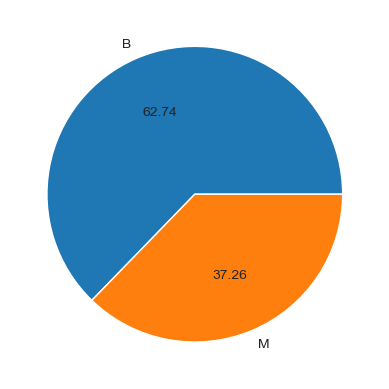

In [133]:
plt.pie(df['diagnosis'].value_counts(), labels=['B', 'M'], autopct="%0.2f")
plt.show()

## Data Cleaning (rimozione valori nulli, duplicati)

stampo le info del dataset per fare una panoramica

In [134]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

controlliamo se ci sono valori nulli.

In [135]:
# Identifica le colonne con almeno un valore nullo
colonne_con_valori_nulli = df.columns[df.isnull().any()].tolist()

# Stampa le colonne con valori nulli
print("Colonne con valori nulli:")
print(colonne_con_valori_nulli)


Colonne con valori nulli:
['Unnamed: 32']


eliminiamo la colonna 32

In [136]:
df.drop(columns=['Unnamed: 32'], inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

La prima cosa da fare è di enumerare la colonna di diagnosi tale che M = 1, B = 0. In questo modo possono essere usati come input per algoritmi di ml.

In [137]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


controllo se sono presenti valori nulli.

In [138]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

non ci sono valori nulli, verifico se ci sono duplicati.

In [139]:
df.duplicated().sum()

0

non ci sono duplicati.

## Data preparation(Feature scaling) 

In [140]:
#split the dataset into dependent(X) and independent(Y) dataset
X=df.iloc[:, 2:31].values #variabile di input
Y=df.iloc[:,1].values #variabile di output

Y=Y.astype('int') #converto gli elementi in interi


In [141]:
#splitting the data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Utilizzo MinMaxScaler che fa parte della libreria scikit-learn.

In [142]:
#Feature Scaling iniziale
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler() #oggetto utilizzato per normalizzare i dati
X_train = scaler.fit_transform(X_train)#adatta lo scaler ai dati di addestramento e trasforma i dati di addestramento
X_test = scaler.transform(X_test)#fit non viene chiamato su x test perchè lo scaler è gia stato adattato ai dati di addestramento


## Data preparation(Feature Selection)


Vado a visualizzare i dati con la matrice di correlazione, che mi restituisce le correlazioni tra le variabili del dataset.

In [143]:
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


vado a rappresentare tali valori con una heatmap che utilizza colori per visualizzare i valori dei coefficienti di correlazione tra le diverse coppie di variabili nel dataset, consentendo di individuare facilmente relazioni tra di esse.
All'interno della mappa:
- Le celle più scure o più chiare indicano correlazioni più forti o più deboli, rispettivamente. 
- le variabili che sono fortemente correlate tra loro (valori vicini a 1 o -1) o variabili che hanno una bassa correlazione (valori vicini a 0).

<Axes: >

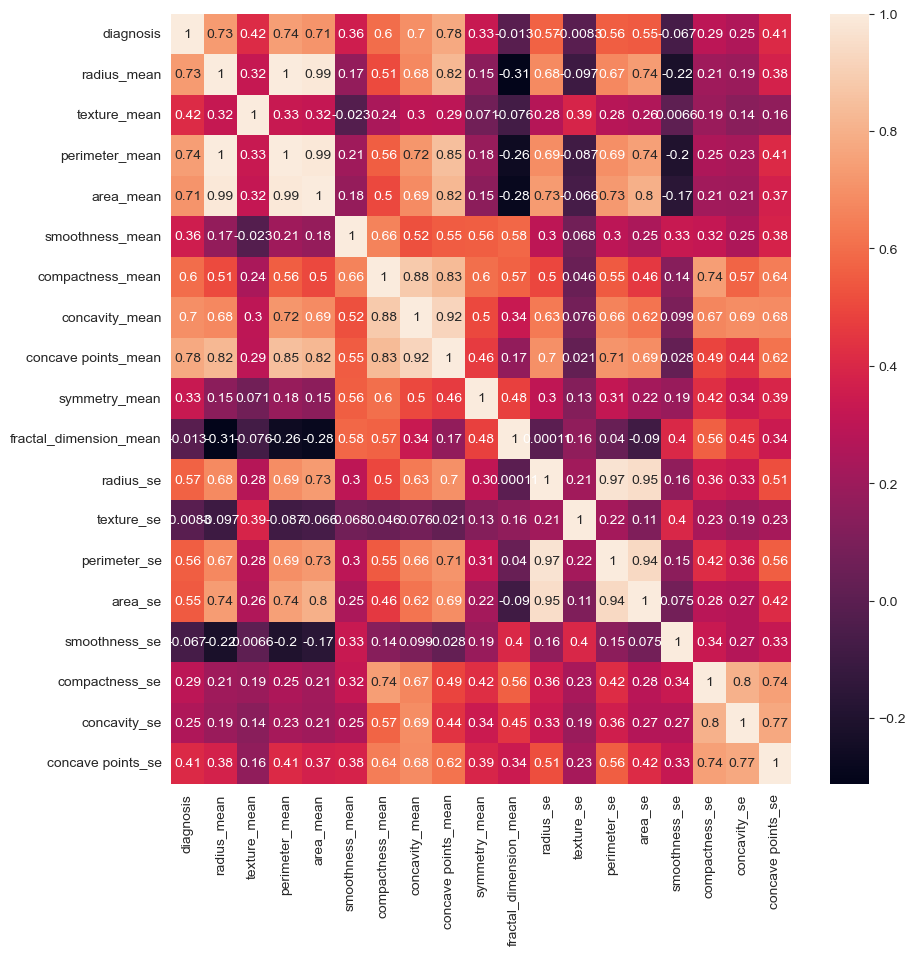

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:20].corr(), annot=True)


Dalla heatmap emergono svariate considerazioni facilemente spiegabili ad esempio:
- forte correlazione tra area_mean, radius_mean e perimeter_mean
- forte correlazione tra Compactness_mean, concavity_mean e concave points_mean 

eliminiamo le colonne correlate

In [145]:
#eliminiamo le colonne correlate
columns_to_drop = ['area_mean','radius_mean','compactness_mean','concavity_mean','area_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst']

# Utilizza il metodo drop per eliminare le colonne specificate
df = df.drop(columns=columns_to_drop, axis=1) #axis=1 vuol dire colonne, axis=0 righe
print(df.head())


         id diagnosis  texture_mean  perimeter_mean  smoothness_mean  \
0    842302         1         10.38          122.80          0.11840   
1    842517         1         17.77          132.90          0.08474   
2  84300903         1         21.25          130.00          0.10960   
3  84348301         1         20.38           77.58          0.14250   
4  84358402         1         14.34          135.10          0.10030   

   concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0              0.14710         0.2419                 0.07871     1.0950   
1              0.07017         0.1812                 0.05667     0.5435   
2              0.12790         0.2069                 0.05999     0.7456   
3              0.10520         0.2597                 0.09744     0.4956   
4              0.10430         0.1809                 0.05883     0.7572   

   texture_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
0      0.9053       0.006399 

Dopo aver eliminato le features correlate possiamo visualizzare nuovamente la matrice di correlazione

<Axes: >

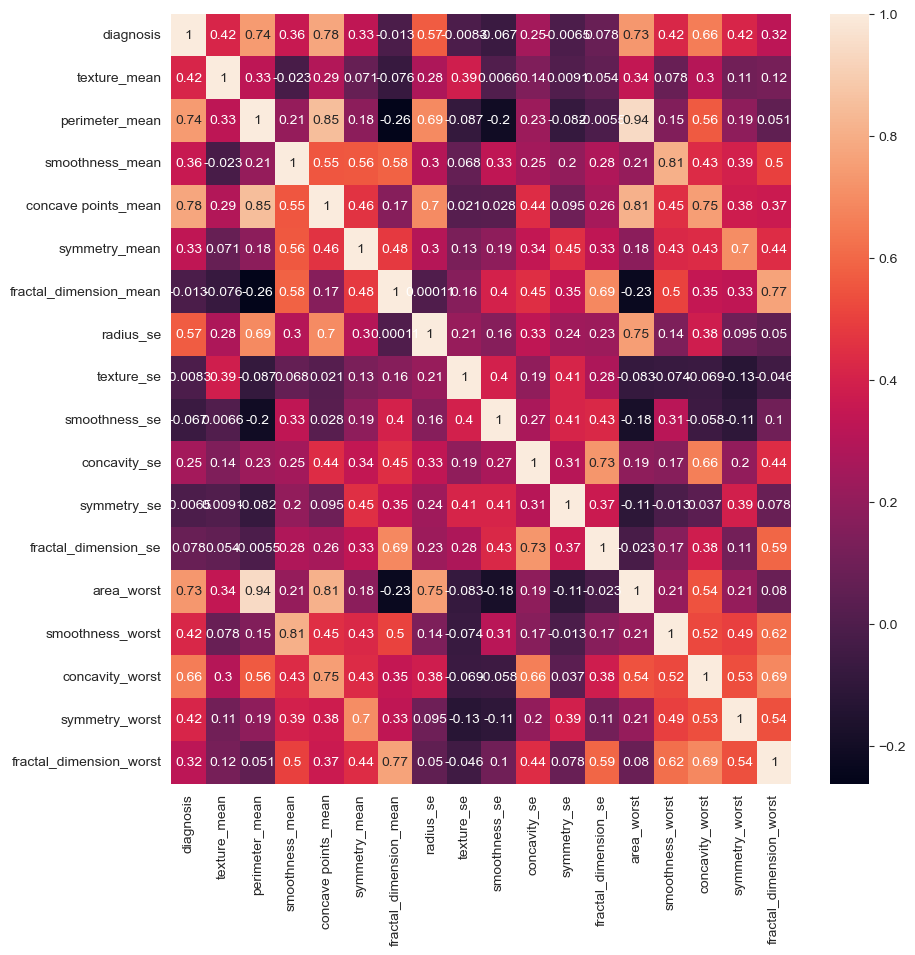

In [146]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:20].corr(), annot=True)

## Data Preparation(Data Balancing)

Ho un dataset sbilanciato. Quindi le tecniche che posso applicare sono 2: Undersampling o Oversampling. Quindi siccome il mio dataset e fortemente sbilanciato con una presenza maggiore di istanze della classe benigna.Ho due possibilità:
Eliminare istanze della classe benigna 
Aumentare istanze della classe maligna.
Tra le due ho scelto la prima

In [147]:

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



In [148]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded_train_Y = lab_enc.fit_transform(Y_train)


# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)


X_train_rus, y_train_rus= rus.fit_resample(X_train, encoded_train_Y)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 149), (1, 149)]


vediamo che ha bilanciato correttamente

## Modeling

adesso il mio dataset e bilanciato e posso procedere con la fase di modeling

In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:

mnb.fit(X_train,Y_train)


MultinomialNB()

facciamo mnb

Accuracy:  0.8362573099415205
Precision:  0.972972972972973
Recall:  0.5714285714285714


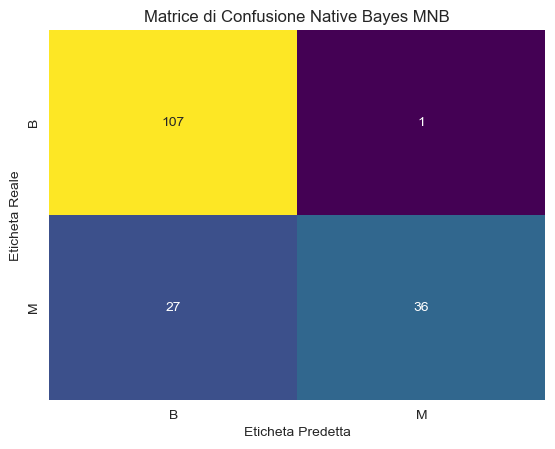

In [152]:
#procedo ad addestrare il modello sui dati di training

mnb.fit(X_train,Y_train)

#predizioni 
y_pred = mnb.predict(X_test)
#metriche
accuracyMNB = accuracy_score(Y_test,y_pred)
precisionMNB = precision_score(Y_test,y_pred)
recallMNB = recall_score(Y_test, y_pred)
#stampo metriche
print('Accuracy: ' ,accuracyMNB)
print('Precision: ' ,precisionMNB)
print('Recall: ' ,recallMNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test, y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione Native Bayes MNB')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()



Naive Bayes GNB (Gaussian)

Accuracy:  0.935672514619883
Precision:  0.9193548387096774
Recall:  0.9047619047619048


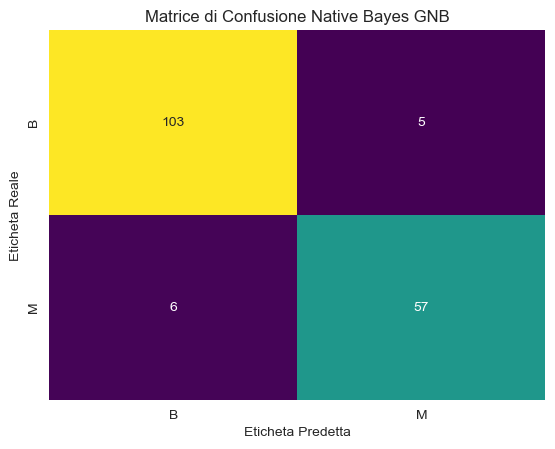

In [153]:
gnb.fit(X_train,Y_train) #training 
y_pred1 = gnb.predict(X_test) #testing
accuracyGNB = accuracy_score(Y_test,y_pred1)
precisionGNB = precision_score(Y_test,y_pred1)
recallGNB = recall_score(Y_test,y_pred1)
print('Accuracy: ' , accuracyGNB)
print('Precision: ' , precisionGNB)
print('Recall: ' , recallGNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred1)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Matrice di Confusione Native Bayes GNB')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()



Naive Bayes BNB (Bernoulli) //Da aggiustare

Accuracy:  0.631578947368421
Precision:  1.0
Recall:  0.0


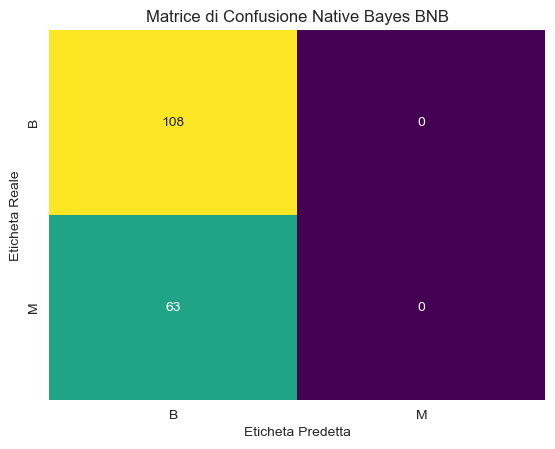

In [154]:
bnb.fit(X_train,Y_train) #training modello
y_pred3 = bnb.predict(X_test) #test modello
accuracyBNB = accuracy_score(Y_test,y_pred3)
precisionBNB = precision_score(Y_test,y_pred3,zero_division=1)
recallBNB = recall_score(Y_test,y_pred3)

print('Accuracy: ' ,accuracyBNB)
print('Precision: ' ,precisionBNB)
print('Recall: ' ,recallBNB)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred3)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione Native Bayes BNB')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

vediamo come si comporta l'algoritmo

  Variante  Precisione    Recall  Accuratezza
0      BNB    1.000000  0.000000     0.631579
1      GNB    0.919355  0.904762     0.935673
2      MNB    0.972973  0.571429     0.836257


(0.0, 1.0, 0.0, 1.0)

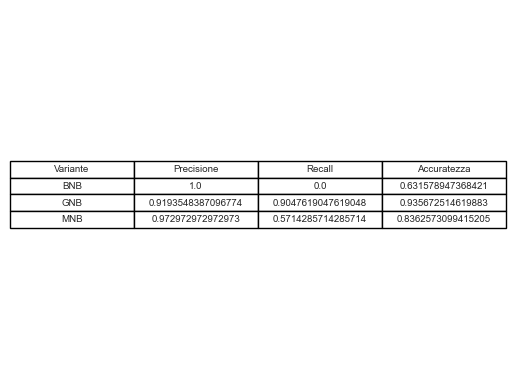

In [155]:
#tabella delle metriche di valutazione ottenute, per ogni distribuzione

data = {
    'Variante': ['BNB', 'GNB', 'MNB'],
    'Precisione': [precisionBNB, precisionGNB, precisionMNB],
    'Recall': [recallBNB, recallGNB, recallMNB],
    'Accuratezza': [accuracyBNB, accuracyGNB, accuracyMNB],
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

# Creazione della tabella con matplotlib
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Rimuovi gli assi

Decision Tree(DTC)

In [156]:
from sklearn.tree import DecisionTreeClassifier
# NOTA da descrivere la scelta della profondità 
dtc = DecisionTreeClassifier(max_depth=3)

Accuracy:  0.9649122807017544
Precision:  0.9672131147540983
Recall:  0.9365079365079365


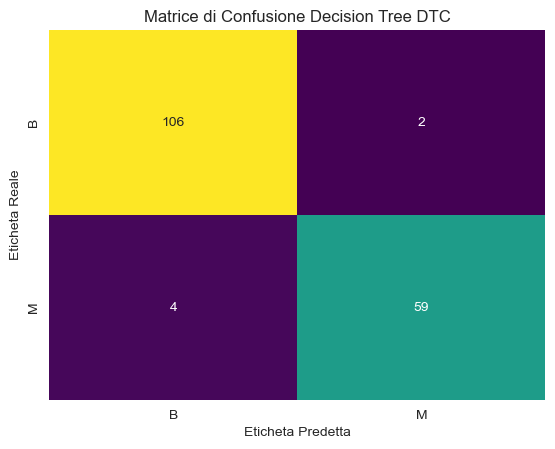

In [157]:
dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
accuracyDTC = accuracy_score(Y_test,y_pred)
precisionDTC = precision_score(Y_test,y_pred)
recallDTC = recall_score(Y_test,y_pred)

print('Accuracy: ' ,accuracyDTC)
print('Precision: ' ,precisionDTC)
print('Recall: ' ,recallDTC)

#plot della matrice di confusione
labels=['B', 'M']
confusion_matrix_result = confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Matrice di Confusione Decision Tree DTC')
plt.xlabel('Eticheta Predetta')
plt.ylabel('Eticheta Reale')
plt.show()

in generale ho ottenuto i seguenti risultati

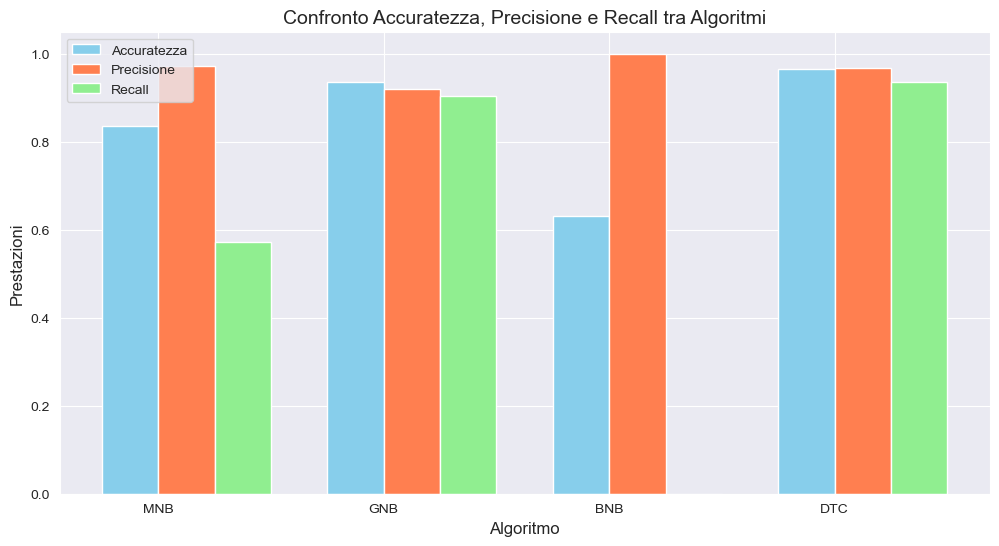

In [158]:
algorithms = ['MNB', 'GNB', 'BNB', 'DTC']

# Risultati delle prestazioni
accuracy_results = [accuracyMNB, accuracyGNB, accuracyBNB, accuracyDTC]
precision_results = [precisionMNB, precisionGNB, precisionBNB, precisionDTC]
recall_results = [recallMNB, recallGNB, recallBNB, recallDTC]

# Larghezza delle barre
bar_width = 0.25

# Posizioni delle barre
index = np.arange(len(algorithms))

# Creo un grafico a barre doppie
plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, accuracy_results, bar_width, label='Accuratezza', color='skyblue')
bar2 = plt.bar(index + bar_width, precision_results, bar_width, label='Precisione', color='coral')
bar3 = plt.bar(index + 2 * bar_width, recall_results, bar_width, label='Recall', color='lightgreen')

# Personalizzo il grafico con i nomi delle label e dimensione font
plt.xlabel('Algoritmo', fontsize=12)
plt.ylabel('Prestazioni', fontsize=12)
plt.title('Confronto Accuratezza, Precisione e Recall tra Algoritmi', fontsize=14)
plt.xticks(index + bar_width / 2, algorithms)
plt.legend()

#eseguo
plt.show()

Con il Decision Tree ho ottenuto prestazioni più bilanciate e in media tra le varie metriche superiori.

  Variante  Precisione    Recall  Accuratezza
0      GNB    0.919355  0.904762     0.935673
1      DTC    0.967213  0.936508     0.964912


(0.0, 1.0, 0.0, 1.0)

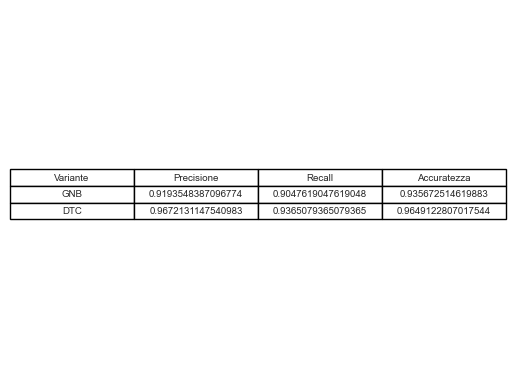

In [159]:
#GNB vs DTC

data = {
    'Variante': ['GNB', 'DTC'],
    'Precisione': [precisionGNB, precisionDTC],
    'Recall': [recallGNB, recallDTC],
    'Accuratezza': [ accuracyGNB, accuracyDTC],
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

# Creazione della tabella con matplotlib
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')  # Rimuovi gli assi

Quindi da come emerge, ho ottenuto buoni risultati con il DTC, mentre i risultati sono peggiori con il Native Bayes GNG.

stampo la curva ROC per il Decision Tree DTC.
La curva ROC è un grafico che rappresenta la performance di un modello di classificazione binaria a vari livelli di soglia di decisione.
Sull'asse delle ascisse (x), si trova il tasso di falsi positivi (FPR), che rappresenta la proporzione di istanze negative erroneamente classificate come positive.
Sull'asse delle ordinate (y), si trova il tasso di veri positivi (TPR), che rappresenta la proporzione di istanze positive correttamente classificate.

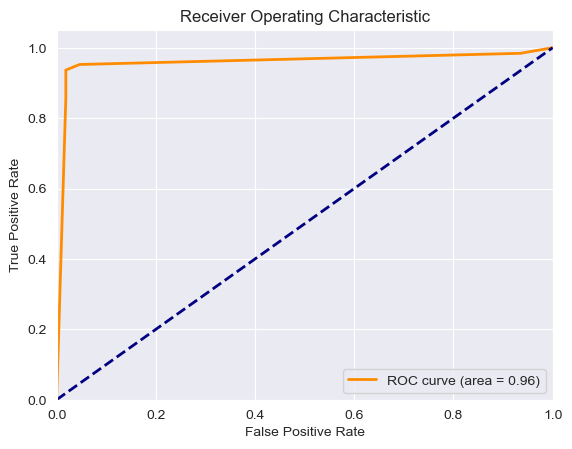

In [160]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Un classificatore ideale avrà una curva ROC che si avvicina il più possibile all’angolo in alto a sinistra del grafico, indicando una sensibilità elevata e una specificità elevata.
Inoltre, l’area sotto la curva ROC (Area Under the Curve, AUC-ROC) è spesso calcolata come una singola metrica riassuntiva delle prestazioni del modello. Un AUC-ROC maggiore indica generalmente una migliore capacità del modello di discriminare tra le classi.

## Evaluation

In tale fase si vanno a fare le valutazioni del modello addestrato, andando ad esaminare i vari test effettuati. Quindi in tale fase si decide se procedere nella fase di deploy, o tornare indietro per effettuare miglioramenti che porterebbero a risultati finali migliori. Nel mio caso con il Decsion Tree DTC ho ottenuto ottimi risultati:
- accuracy: 0.967
- precision: 0.936
- recall: 0.964